In [306]:
import numpy as np
from scipy.stats import norm
import math
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Option pricing (Black-Scholes) calculator
*Call option:* $C = S_0 \cdot N(d_{1}) - K \cdot e^{-rT} \cdot N(d_2)$

*Put option:* $C = K \cdot e^{rT} \cdot N(-d_2) - S_0 * N(-d_{1})$

$d_1 = \frac{ln(\frac{S_0}{K})+(r\cdot\frac{\sigma^2}{2})\cdot T}{\sigma \cdot \sqrt{T}}$

$d_2 = d_1 - \sigma \cdot \sqrt{T}$

$S_0$ = Current value of underlying asset

$K$ = Strike price of the option

$T$ = Time to experation (years)

$\sigma$ = Volatility of the underlying asset

$r$ = Risk free rate

$N(x)$ = Cumulative distribution function of the standard normal distribution


In [26]:
def getD1(S, K, r, sigma, T):
    return (np.log(S/K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))

In [28]:
def getD2(d1, sigma, T):
    return d1 - sigma * np.sqrt(T)

In [30]:
def getCallOptionPrice(S, K, sigma, r, T):
    d1 = getD1(S, K, r, sigma, T)
    d2 = getD2(d1, sigma, T)
    return S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)

In [32]:
def getPutOptionPrice(S, K, sigma, r, T):
    d1 = getD1(S, K, r, sigma, T)
    d2 = getD2(d1, sigma, T)
    return K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [34]:
S = 100 # Current value of underlying asset
K = 95 # Strike price
T = 1 # Years to expiry
r = 0.05 # Risk free
sigma = 0.2 # Volaitlity

call_price = getCallOptionPrice(S, K, sigma, r, T)
print(f"Call option price: {call_price:.2f}")
put_price = getPutOptionPrice(S, K, sigma, r, T)
print(f"Put option price: {put_price:.2f}")

Call option price: 13.35
Put option price: 3.71


In [362]:
ticker = 'ARION.IC'
start_date = '2020-01-01'
end_date = '2024-12-31'

In [364]:
df = yf.download(tickers=ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [376]:
df['log_returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
vol = df['log_returns'].std() * np.sqrt(252)
curr_price = df['Adj Close'].iloc[-1]
risk_free = 0.0825
strike_price = curr_price #atm
expiry_time = 1
print(f"Volatility: {vol}\nRisk free rate: {risk_free}\nStrike price: {strike_price}\nCurrent price: {curr_price}\nExpiry time: {expiry_time}")

Volatility: 0.2394449027676625
Risk free rate: 0.0825
Strike price: 167.0
Current price: 167.0
Expiry time: 1


In [378]:
call_price = getCallOptionPrice(curr_price, strike_price, vol, risk_free, expiry_time)
print(f"Call option price: {call_price:.2f}")
put_price = getPutOptionPrice(curr_price, strike_price, vol, risk_free, expiry_time)
print(f"Put option price: {put_price:.2f}")

Call option price: 22.79
Put option price: 9.57


In [380]:
sp_diff = [-10, -5, 0, 5, 10]
call_prices = [getCallOptionPrice(curr_price, curr_price + x, vol, risk_free, expiry_time) for x in sp_diff]
put_prices = [getPutOptionPrice(curr_price, curr_price + x, vol, risk_free, expiry_time) for x in sp_diff]

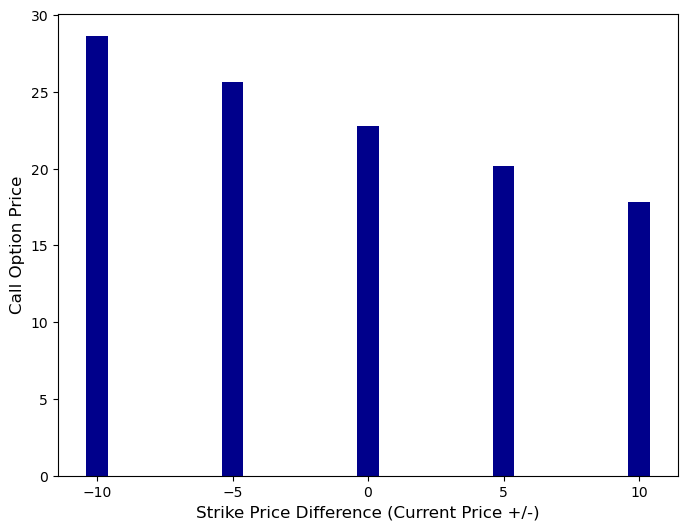

In [382]:
plt.figure(figsize=(8, 6))
plt.bar(sp_diff, call_prices, color='darkblue')
plt.xlabel('Strike Price Difference (Current Price +/-)', fontsize=12)
plt.ylabel('Call Option Price', fontsize=12)
plt.xticks(sp_diff)
plt.show()

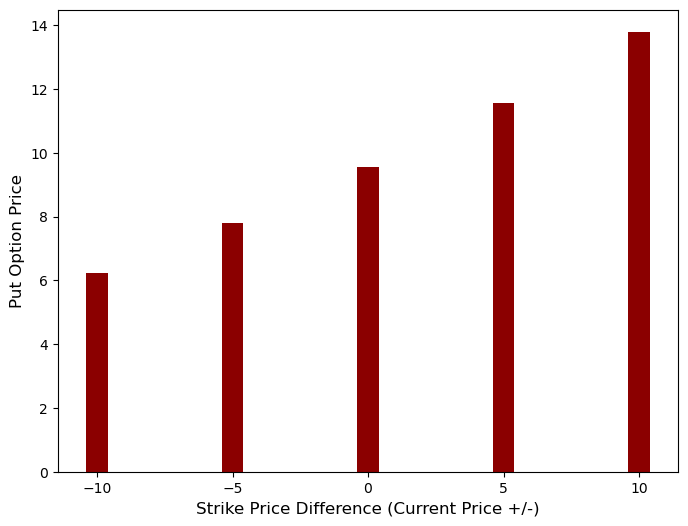

In [384]:
plt.figure(figsize=(8, 6))
plt.bar(sp_diff, put_prices, color='darkred')
plt.xlabel('Strike Price Difference (Current Price +/-)', fontsize=12)
plt.ylabel('Put Option Price', fontsize=12)
plt.xticks(sp_diff)
plt.show()